NAME: AVINASH,
MOVIE GENRE CLASSIFICATION
 PROBLEM STATEMENT:
 Create a machine learning model that can predict the genre of a
 movie based on its plot summary or other textual information. You
 can use techniques like TF-IDF or word embeddings with classifiers
 such as Naive Bayes, Logistic Regression, or Support Vector
 Machines.
 DATA SET LINK: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [9]:
data_frame_description=pd.read_csv('/content/description.txt')
data_frame_description

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


In [10]:
data_frame_train=pd.read_csv('/content/train_data.txt',sep=':::',names=['ID','TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

In [11]:
data_frame_train.shape

(4762, 4)

In [12]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4762 entries, 0 to 4761
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           4762 non-null   int64 
 1   TITLE        4762 non-null   object
 2   GENRE        4762 non-null   object
 3   DESCRIPTION  4762 non-null   object
dtypes: int64(1), object(3)
memory usage: 148.9+ KB


In [13]:
data_frame_train.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [14]:
data_frame_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [15]:
data_frame_train.isnull().sum()

,0
ID,0
TITLE,0
GENRE,0
DESCRIPTION,0


In [16]:
data_frame_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4762.0,2381.5,1374.815321,1.0,1191.25,2381.5,3571.75,4762.0


In [17]:
data_frame_train.GENRE.unique()


array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [18]:
data_frame_train.GENRE.value_counts()

,count
GENRE,
drama,1188
documentary,1154
comedy,661
short,450
horror,178
thriller,169
action,117
western,88
reality-tv,81


<Axes: xlabel='GENRE'>

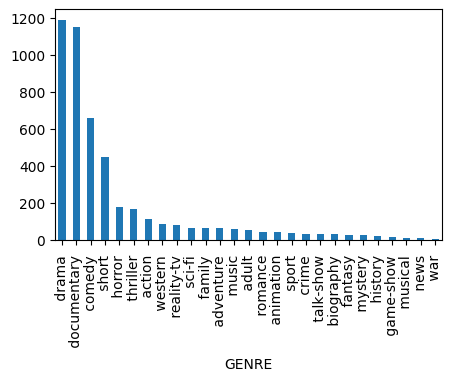

In [19]:
data_frame_train["GENRE"].value_counts().plot(kind="bar",figsize=(5,3))


In [20]:
data_frame_test=pd.read_csv('test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'], engine='python')


In [21]:
data_frame_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           4909 non-null   int64 
 1   TITLE        4909 non-null   object
 2   DESCRIPTION  4909 non-null   object
dtypes: int64(1), object(2)
memory usage: 115.2+ KB


In [22]:
data_frame_test.head()


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [23]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS= set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
from nltk.tokenize import word_tokenize
import re # For replacing any text if required

def Pre_process_text(act_string):
    # remove all values other than alphabets
    act_string= re.sub(r'[^a-zA-Z+]'," ", act_string)
    act_string = act_string.lower() # lowercasing text
    Token_words = word_tokenize(act_string) # to tokenize strings into words
    #Remove stop words and to return base form of a word
    new_string = [wordnet.lemmatize(word) for word in Token_words if not word in STOP_WORDS] # removing stopwords
    new_string = ' '.join(new_string)
    return new_string

In [26]:
data_frame_train['DESCRIPTION_cleaned'] = data_frame_train['DESCRIPTION'].apply(Pre_process_text)
data_frame_train.head()


,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_cleaned
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent year old ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers un recovered body ground zer...


In [27]:
data_frame_test['DESCRIPTION_cleaned_test'] = data_frame_test['DESCRIPTION'].apply(Pre_process_text)
data_frame_test.head()

,ID,TITLE,DESCRIPTION,DESCRIPTION_cleaned_test
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid = TfidfVectorizer()
X_train_Tfid = Tfid .fit_transform(data_frame_train["DESCRIPTION_cleaned"])
X_Test =Tfid.transform(data_frame_test["DESCRIPTION_cleaned_test"])

In [29]:
features = X_train_Tfid
target = data_frame_train["GENRE"]

In [30]:
from sklearn.model_selection import train_test_split
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)

In [31]:
# Learn the Logistic Regression Model on train data
from sklearn.linear_model import LogisticRegression
my_model_LR=LogisticRegression()

In [32]:
my_model_LR=my_model_LR.fit(X_train, y_train)

In [33]:
y_pred_LR = my_model_LR.predict(X_test)
y_pred_LR

array([' documentary ', ' documentary ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' drama ', ' drama ', ' documentary ',
       ' drama ', ' comedy ', ' documentary ', ' documentary ',
       ' documentary ', ' documentary ', ' documentary ', ' documentary ',
       ' drama ', ' comedy ', ' drama ', ' documentary ', ' documentary ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' documentary ',
       ' drama ', ' documentary ', ' documentary ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' documentary ', ' documentary ',
       ' comedy ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' drama ', ' documentary ', ' documentary ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' horror ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' drama ', ' documentary ',
       ' documentary ', ' d

In [34]:
from sklearn.metrics import accuracy_score, classification_report
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_LR)

0.5015739769150053

In [35]:
print(classification_report(y_pred_LR,y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.35      0.47      0.40        92
       crime        0.00      0.00      0.00         0
 documentary        0.93      0.54      0.68       393
       drama        0.84      0.47      0.61       458
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.06      1.00      0.11         2
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

In [36]:
from sklearn.naive_bayes import MultinomialNB
# Learn the Multinomial Naive Bayes Model on train data
my_model_NB= MultinomialNB()

In [37]:
my_model_NB=my_model_NB.fit(X_train, y_train)

In [38]:
y_pred_NB = my_model_NB.predict(X_test)
y_pred_NB

array([' documentary ', ' documentary ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' drama ', ' documentary ', ' documentary ', ' documentary ',
       ' documentary ', ' documentary ', ' documentary ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' documentary ', ' drama ',
       ' drama ', ' documentary ', ' documentary ', ' documentary ',
       ' drama ', ' documentary ', ' documentary ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' documentary ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' drama ', ' documentary ', ' drama ', ' documentary ', ' drama ',
       ' documentary ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' drama ', ' 

In [39]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_NB)

0.459601259181532

In [40]:
print(classification_report(y_pred_NB,y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.01      1.00      0.02         1
       crime        0.00      0.00      0.00         0
 documentary        0.92      0.53      0.67       399
       drama        0.89      0.41      0.56       553
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

In [41]:
from sklearn.svm import SVC
my_model_SVC= SVC(gamma='auto')

In [42]:
my_model_SVC.fit(X_train, y_train)

SVC(gamma='auto')

In [43]:
y_pred_SVC = my_model_SVC.predict(X_test)
y_pred_SVC

array([' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', 

In [44]:
accuracy_score(y_test, y_pred_SVC)

0.26862539349422876

In [45]:
print(classification_report(y_pred_SVC,y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.00      0.00      0.00         0
       crime        0.00      0.00      0.00         0
 documentary        0.00      0.00      0.00         0
       drama        1.00      0.27      0.42       953
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

In [46]:
Genre_Predicted_Test_data= my_model_LR.predict(X_Test)
data_frame_test['Genre_Predicted'] = Genre_Predicted_Test_data
data_frame_test.head()

,ID,TITLE,DESCRIPTION,DESCRIPTION_cleaned_test,Genre_Predicted
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...,drama
